In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_palette("Set3")

### Benchmark METABRIC

In [2]:
with open('../output/metabric_benchmark.pkl', 'rb') as f:
    df_bench = pickle.load(f)

In [67]:
df_bench.groupby(['method'])['dt_c_index'].mean().sort_values()

method
DeepHit    0.597294
CoxPH      0.634266
CoxCC      0.637990
Name: dt_c_index, dtype: float64

In [68]:
with open('../data/benchmark_metabric/eval_metrics_metabric.pkl', 'rb') as f:
    data = pickle.load(f)

In [69]:
data.reset_index(inplace=True)

data['epoch'] = data.groupby(['model_type', 'cv'])['index'].rank()

data['model'] = data['model_type'].map({
    'base': 'base',
    'binary': 'with cross-entropy loss',
    'contrastive': 'with contrastive loss'
})

data['epoch'] = data['epoch'].astype(int)

last_epoch_results = data[data['epoch'] == data['epoch'].max()]

In [70]:
last_epoch_results.groupby(['model'])['dt_c_index'].mean().sort_values()

model
base                       0.658463
with cross-entropy loss    0.659261
with contrastive loss      0.668932
Name: dt_c_index, dtype: float64

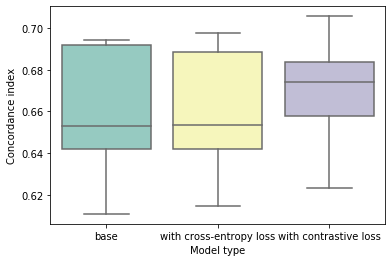

In [71]:
plot = sns.boxplot(data=last_epoch_results, x='model', y='dt_c_index')
plot.set(xlabel="Model type", ylabel="Concordance index")
fig = plot.get_figure()
fig.savefig("../output/metabric_eval.png")

In [72]:
# plot every n point
plot_n = 3
epochs_to_plot = np.linspace(0, data['epoch'].max(), int(data['epoch'].max()/plot_n)).astype(int)

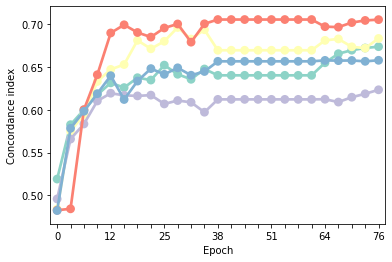

In [73]:
plot = sns.pointplot(data=data[(data['model_type'] == 'contrastive') & (data['epoch'].isin(epochs_to_plot))], x='epoch', y='dt_c_index', hue='cv')
plot.set_xticklabels(epochs_to_plot)
for i, label in enumerate(plot.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
plot.set(xlabel="Epoch", ylabel="Concordance index")
plot.get_legend().remove()

### More epochs METABRIC

In [54]:
with open('../data/reproduce_metabric/eval_metrics_metabric.pkl', 'rb') as f:
    data = pickle.load(f)

In [55]:
data

,train_loss,train_main_loss,val_loss,val_main_loss,dt_c_index,int_brier_score,int_nbill,model_type,time,cv
0,5.295912,5.295912,5.093664,5.093664,0.446537,0.467916,3.414805,base,116.334030,0
1,3.635252,3.635252,3.532288,3.532288,0.483110,0.389047,2.403512,base,116.334030,0
2,3.027849,3.027849,3.218875,3.218875,0.496574,0.357298,1.915344,base,116.334030,0
3,2.539115,2.539115,2.487246,2.487246,0.496634,0.317768,1.467036,base,116.334030,0
4,2.116094,2.116094,2.111286,2.111286,0.481506,0.290169,1.143553,base,116.334030,0
...,...,...,...,...,...,...,...,...,...,...
325,1.129421,1.073287,1.144213,1.092137,0.667416,0.186022,0.547837,contrastive,137.098316,4
326,1.125372,1.070003,1.155530,1.102686,0.667416,0.186022,0.547837,contrastive,137.098316,4
327,1.131500,1.076016,1.166263,1.112818,0.667416,0.186022,0.547835,contrastive,137.098316,4
328,1.122350,1.067682,1.153956,1.099190,0.667396,0.186022,0.547836,contrastive,137.098316,4


In [56]:
data['model_type'].value_counts()

contrastive    1650
binary         1650
base           1650
Name: model_type, dtype: int64

In [57]:
data.reset_index(inplace=True)

data['epoch'] = data.groupby(['model_type', 'cv'])['index'].rank()

data['model'] = data['model_type'].map({
    'base': 'base',
    'binary': 'with cross-entropy loss',
    'contrastive': 'with contrastive loss'
})

data['epoch'] = data['epoch'].astype(int)

last_epoch_results = data[data['epoch'] == data['epoch'].max()]

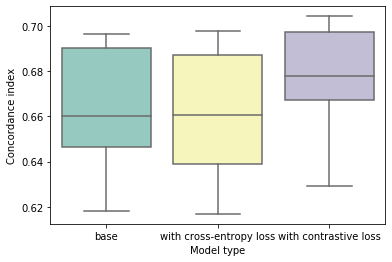

In [58]:
plot = sns.boxplot(data=last_epoch_results, x='model', y='dt_c_index')
plot.set(xlabel="Model type", ylabel="Concordance index")
fig = plot.get_figure()
fig.savefig("../output/metabric_eval.png")

In [59]:
# plot every n point
plot_n = 8
epochs_to_plot = np.linspace(0, data['epoch'].max(), int(data['epoch'].max()/plot_n)).astype(int)

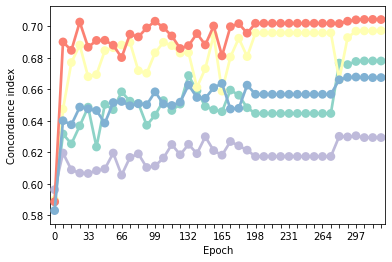

In [60]:
plot = sns.pointplot(data=data[(data['model_type'] == 'contrastive') & (data['epoch'].isin(epochs_to_plot))], x='epoch', y='dt_c_index', hue='cv')
plot.set_xticklabels(epochs_to_plot)
for i, label in enumerate(plot.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
plot.set(xlabel="Epoch", ylabel="Concordance index")
plot.get_legend().remove()
fig = plot.get_figure()
fig.savefig("../output/metabric_contrastive.png")

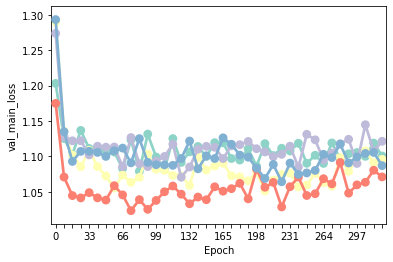

In [61]:
plot = sns.pointplot(data=data[(data['model_type'] == 'contrastive') & (data['epoch'].isin(epochs_to_plot))], x='epoch', y='val_main_loss', hue='cv')
plot.set_xticklabels(epochs_to_plot)
for i, label in enumerate(plot.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
plot.set(xlabel="Epoch", ylabel="val_main_loss")
plot.get_legend().remove()

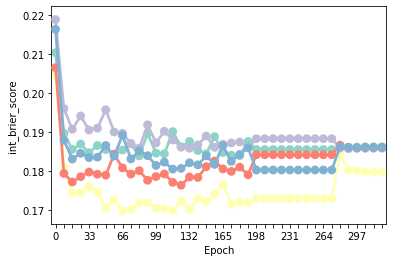

In [62]:
plot = sns.pointplot(data=data[(data['model_type'] == 'contrastive') & (data['epoch'].isin(epochs_to_plot))], x='epoch', y='int_brier_score', hue='cv')
plot.set_xticklabels(epochs_to_plot)
for i, label in enumerate(plot.xaxis.get_ticklabels()):
    if i % 4 != 0:
        label.set_visible(False)
plot.set(xlabel="Epoch", ylabel="int_brier_score")
plot.get_legend().remove()

In [63]:
last_epoch_results.groupby(['model'])['dt_c_index'].mean().sort_values()

model
with cross-entropy loss    0.660286
base                       0.662230
with contrastive loss      0.675196
Name: dt_c_index, dtype: float64

### KKBOX

In [19]:
df = pd.read_csv("../data/reproduce_kkbox/report.csv", index_col=0)

In [20]:
df = df[df['epoch'] < 30]

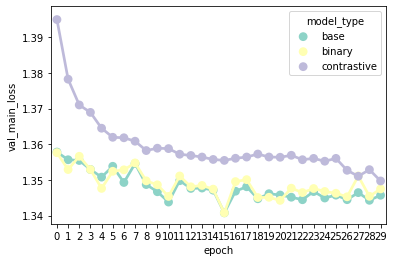

In [21]:
sns.pointplot(data=df, y='val_main_loss', x='epoch', hue='model_type')

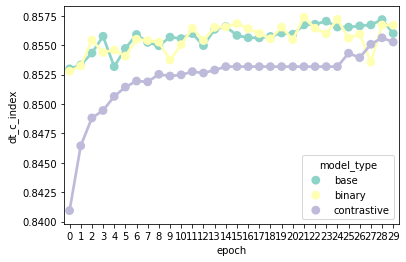

In [22]:
sns.pointplot(data=df, y='dt_c_index', x='epoch', hue='model_type');

In [23]:
df['rank'] = df.groupby(['dataset', 'model_type'])['epoch'].rank(ascending=False)
df_final = df[df['rank'] == 1].drop(['rank'], axis=1)
df_final.drop(['epoch'], axis=1, inplace=True)
df_final = df_final.groupby(['dataset', 'model_type']).agg({
    'train_loss': 'mean', 'train_main_loss': 'mean', 'val_loss': 'mean', 'val_main_loss': 'mean',
    'dt_c_index': 'mean', 'int_brier_score': 'mean', 'int_nbill': 'mean', 'time': 'mean'
})

In [24]:
df_final

train_loss  train_main_loss  val_loss  val_main_loss  \
dataset model_type                                                          
kkbox   base           1.346122         1.346122  1.345719       1.345719   
        binary         1.839493         1.348103  1.838880       1.347490   
        contrastive    1.955381         1.349266  1.955738       1.349723   

                     dt_c_index  int_brier_score  int_nbill          time  
dataset model_type                                                         
kkbox   base           0.855995         0.116136   0.359263   3628.256640  
        binary         0.856695         0.116465   0.361393   4347.218064  
        contrastive    0.855262         0.114326   0.355903  23150.679292